In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/instant-gratification/sample_submission.csv
/kaggle/input/instant-gratification/train.csv
/kaggle/input/instant-gratification/test.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

train=pd.read_csv("/kaggle/input/instant-gratification/train.csv")
test=pd.read_csv("/kaggle/input/instant-gratification/test.csv")
submission=pd.read_csv("/kaggle/input/instant-gratification/sample_submission.csv")


In [ ]:
print(test.shape)

In [ ]:
print(train["target"].value_counts())

<Axes: >

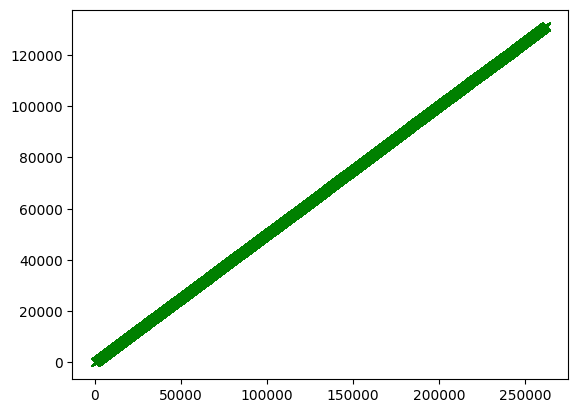

In [32]:
train["target"].cumsum().plot(color='green',linestyle='--',marker='x')

In [35]:
train.select_dtypes(include=["object","int64"]).head()

id  wheezy-copper-turtle-magic  target
0  707b395ecdcbb4dc2eabea00e4d1b179                          99       0
1  5880c03c6582a7b42248668e56b4bdec                          52       0
2  4ccbcb3d13e5072ff1d9c61afe2c4f77                         230       1
3  e350f17a357f12a1941f0837afb7eb8d                          78       0
4  a8f910ea6075b6376af079055965ff68                         497       0

In [38]:
train_columns=[c for c in train.columns if c not in ["id","target"]]


In [40]:
train[train_columns].nunique()

muggy-smalt-axolotl-pembus              254322
dorky-peach-sheepdog-ordinal            254588
slimy-seashell-cassowary-goose          254356
snazzy-harlequin-chicken-distraction    254576
frumpy-smalt-mau-ordinal                254330
                                         ...  
jumpy-thistle-discus-sorted             254261
muggy-turquoise-donkey-important        254366
blurry-buff-hyena-entropy               254345
bluesy-chocolate-kudu-fepid             254329
gamy-white-monster-expert               254192
Length: 256, dtype: int64

In [45]:
print(np.where(train[train_columns].nunique()<250000))

(array([146]),)


In [46]:
print(train_columns[146])

wheezy-copper-turtle-magic


In [47]:
train["wheezy-copper-turtle-magic"].nunique()

512

In [48]:
print(train["wheezy-copper-turtle-magic"].value_counts().mean())

512.0


In [53]:
train["wheezy-copper-turtle-magic"].value_counts().rename_axis("wheezy-copper-turtle-magic").reset_index(name="counts")

wheezy-copper-turtle-magic  counts
0                            51     570
1                           489     556
2                           298     554
3                           135     554
4                           245     553
..                          ...     ...
507                         277     476
508                         215     475
509                         108     472
510                          42     471
511                         185     442

[512 rows x 2 columns]

In [57]:
train_columns=[c for c in train.columns if c not in ["id","target","wheezy-copper-turtle-magic"]]
describe_train=train[train_columns].describe().T.drop("count",axis=1)
cmap=sns.diverging_palette(5,250,as_cmap=True)
describe_train.T.style.background_gradient(cmap,axis=1).format(precision=2)
